In [1]:
from IPython.display import display

In [2]:
from IPython.display import Image

# URL of the image
image_url = "https://github.com/rajvepuri999/Capstone-project/raw/main/wallmart%20image.jpg"

# Display the image
Image(url=image_url)


# Description:
One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.

Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.

Dataset Info:
This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields:

.Store - the store number
.Date - the week of sales
.Weekly_Sales - sales for the given store
.Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
.Temperature - Temperature on the day of sale
.Fuel_Price - Cost of fuel in the region
.CPI – Prevailing consumer price index
.Unemployment - Prevailing unemployment rate


# Objective:
Problem Statement 1:
A retail store that has multiple outlets across the country are facing issues in managing the inventory - to match the demand with respect to supply. You are a data scientist, who has to come up with useful insights using the data and make prediction models to forecast the sales for X number of months/years.
*Dataset Information:*

The walmart.csv contains 6435 rows and 8 columns.

Using the above data, come up with useful insights that can be used by each of the stores to improve in various areas.
Forecast the sales for each store for the next 12 weeks.

# Stractegic Plan of Action:
We aim to solve the problem statement by creating a plan of action, Here are some of the necessary steps:

Data Exploration
Exploratory Data Analysis (EDA)
Data Pre-processing and Manipulation
Feature Creation/Selection/Extraction
Predictive Modelling with Regressor algorithms and sales forecasting
Predictive Modelling with stats model algorithms and sales forecasting
Project Outcomes & Conclusion

# 1. Data Exploration

In [3]:
# for handling dataset and mathematical operations
import os
import math
import pandas as pd
import numpy as np
from IPython.display import display

# for visualization 
import matplotlib.pyplot as plt
import seaborn as sns
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

# import the preprocessing classes
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# import train/test split module
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
#pip install --user xgboost

In [5]:
#!pip install xgboost

In [6]:
#pip install pmdarima

In [7]:
# importing some machine learning regressor algorithms
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline

# importing the Time Series algorithm for forecasting
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults
from pmdarima.utils import decomposed_plot
from pmdarima.arima import decompose
from pmdarima import auto_arima

# import metrics
from sklearn.metrics import mean_squared_error

#### Importing the Dataset

In [8]:
# Here, I am using the path of the main dataset 'walmart.csv' 
data = pd.read_csv(r"C:\Users\Raja\Desktop\desk\Data Science\Capstone project\1\Walmart.csv")

display(data.head(10))

print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(data.shape[1], data.shape[0]))

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808



Inference: The Datset consists of 8 features & 6435 samples.


In [9]:
data.tail(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6425,45,24-08-2012,718232.26,0,72.62,3.834,191.344887,8.684
6426,45,31-08-2012,734297.87,0,75.09,3.867,191.461281,8.684
6427,45,07-09-2012,766512.66,1,75.70,3.911,191.577676,8.684
6428,45,14-09-2012,702238.27,0,67.87,3.948,191.699850,8.684
6429,45,21-09-2012,723086.20,0,65.32,4.038,191.856704,8.684
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [10]:
# creating dataset for time series and time series analysis related insights
original_df = data.copy(deep=True)# making a copy of original dataset

original_df['Date'] = pd.to_datetime(original_df['Date']) #changing data to datetime #changing data to datetime for decomposing

In [11]:
original_df.set_index('Date', inplace=True) #seting date as index

In [12]:
original_df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-05-02,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-12-02,1,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106
2010-05-03,1,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...
2012-09-28,45,713173.95,0,64.88,3.997,192.013558,8.684
2012-05-10,45,733455.07,0,64.89,3.985,192.170412,8.667
2012-12-10,45,734464.36,0,54.47,4.000,192.327265,8.667


In [13]:
# Access data for a specific date (e.g., '2023-10-02')
specific_date = '2010-05-03'
data_for_specific_date = original_df.loc[specific_date]
print(data_for_specific_date)

            Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-05-03      1    1554806.68             0        46.50       2.625   
2010-05-03      2    1991013.13             0        47.17       2.625   
2010-05-03      3     415202.04             0        53.04       2.625   
2010-05-03      4    1971057.44             0        43.49       2.654   
2010-05-03      5     288855.71             0        48.89       2.625   
2010-05-03      6    1601348.82             0        49.63       2.625   
2010-05-03      7     491419.55             0        35.86       2.620   
2010-05-03      8     881503.95             0        45.64       2.625   
2010-05-03      9     507297.88             0        48.43       2.625   
2010-05-03     10    1987090.09             0        55.92       2.877   
2010-05-03     11    1426622.65             0        53.96       2.625   
2010-05-03     12    1077018.27       

In [14]:
# accessing  data for a range of dates using slicing
# For example, data for dates from '2023-10-02' to '2023-10-03'
date_range_data = original_df['2010-05-10':'2010-05-15']

# Print the data for the date range
print(date_range_data)

            Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-05-14      1    1494251.50             0        74.78       2.854   
2010-05-11      1    1551659.28             0        58.74       2.689   
2010-05-14      2    1880752.36             0        73.31       2.854   
2010-05-11      2    1939061.41             0        57.85       2.689   
2010-05-14      3     384357.94             0        77.18       2.854   
...           ...           ...           ...          ...         ...   
2010-05-11     43     605960.20             0        62.52       2.689   
2010-05-14     44     286515.92             0        50.15       2.962   
2010-05-11     44     270516.84             0        49.96       2.831   
2010-05-14     45     758182.20             0        54.26       2.982   
2010-05-11     45     764014.06             0        45.65       2.917   

                   CPI  Unemployment 

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   weekday       6435 non-null   int64  
 8   month         6435 non-null   int64  
 9   year          6435 non-null   int64  
 10  week          6435 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 553.1 KB


In [16]:
# Reframing the columns

data.Date=pd.to_datetime(data.Date)

# creating few columns to visualise and project some insights with the data
data['weekday'] = data.Date.dt.weekday
data['month'] =data.Date.dt.month
data['year'] = data.Date.dt.year
data['week'] =data['Date'].dt.week

In [17]:
# dropping the Date columns
data.drop(['Date'], axis=1, inplace=True)

# creating separate dataset for getting insightfrom the data
df = data.copy(deep=True)

In [18]:
target = 'Weekly_Sales'
features = [i for i in data.columns if i not in [target]]

display(df.head(10))

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year,week
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010,17
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010,48
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010,7
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010,8
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2010,18
5,1,1439541.59,0,57.79,2.667,211.380643,8.106,4,12,2010,48
6,1,1472515.79,0,54.58,2.720,211.215635,8.106,4,3,2010,11
7,1,1404429.92,0,51.45,2.732,211.018042,8.106,4,3,2010,12
8,1,1594968.28,0,62.27,2.719,210.820450,7.808,3,2,2010,5
9,1,1545418.53,0,65.86,2.770,210.622857,7.808,5,9,2010,35


In [19]:
# checking null values
df[df.duplicated()].isna().sum()

Store           0.0
Weekly_Sales    0.0
Holiday_Flag    0.0
Temperature     0.0
Fuel_Price      0.0
CPI             0.0
Unemployment    0.0
weekday         0.0
month           0.0
year            0.0
week            0.0
dtype: float64

In [20]:
# checking duplicated values
df[df.duplicated()].sum()

Store           0.0
Weekly_Sales    0.0
Holiday_Flag    0.0
Temperature     0.0
Fuel_Price      0.0
CPI             0.0
Unemployment    0.0
weekday         0.0
month           0.0
year            0.0
week            0.0
dtype: float64

In [21]:
#Checking number of unique rows in each feature

df.nunique().sort_values()

Holiday_Flag       2
year               3
weekday            7
month             12
Store             45
week              52
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
Weekly_Sales    6435
dtype: int64

In [22]:
#Checking number of unique rows in each feature

nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=45:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 5 numerical & 5 categorical features.


In [129]:
#Checking the stats of all the columns

display(df.describe())
print('\n\033[1mInference:\033[0m The stats seem to be fine, let us do further analysis on the Dataset.')

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year,week
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,3.573427,6.475524,2010.965035,26.000000
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,1.426581,3.321797,0.797019,14.511794
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,0.000000,1.000000,2010.000000,1.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,4.000000,4.000000,2010.000000,14.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,4.000000,6.000000,2011.000000,26.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,4.000000,9.000000,2012.000000,38.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,6.000000,12.000000,2012.000000,52.000000



Inference: The stats seem to be fine, let us do further analysis on the Dataset.


In [24]:
# to find the rows having outliers 

def find_outlier_rows(df, col, level='both'):
    iqr = df[col].quantile(0.75) - df[col].quantile(0.25)
    
    lower_bound = df[col].quantile(0.25) - 1.5 * iqr
    upper_bound = df[col].quantile(0.75) + 1.5 * iqr

    if level == 'lower':
        return df[df[col] < lower_bound]
    elif level == 'upper':
        return df[df[col] > upper_bound]
    else:
        return df[(df[col] > upper_bound) | (df[col] < lower_bound)]

In [25]:
# to find the count of the outliers

def count_outliers(df):
    df_numeric = df.select_dtypes(include=['int', 'float'])

    columns = df_numeric.columns

    outlier_cols = [col for col in columns if len(find_outlier_rows(df_numeric, col)) != 0]
    
    outliers_df = pd.DataFrame(columns=['outlier_counts', 'outlier_percent'])

    for col in outlier_cols:
        outlier_count = len(find_outlier_rows(df_numeric, col))
        all_entries = len(df[col])
        outlier_percent = round(outlier_count * 100 / all_entries, 2)

        outliers_df.loc[col] = [outlier_count, outlier_percent]

    return outliers_df

#### Count the outliers in the columns of the sales dataframe

In [131]:
count_outliers(df).sort_values('outlier_counts', ascending=False)
#Checking the stats of all the columns

print('\n\033[1mInference:\033[0m  The above dataframe shows that weekday, weekly_sales, holiday_flag, temperature and unemployment columns all have outliers with unemployment having the largest outlier percentage, 7%.However, we can ignore the weekday as it is less relevant according to the problem statement and also, weekly_sales, as per the problem statement we will perform the time series analysis and forecast the weekly sales for the different 45 stores.Let’s examine the outliers in each columns except weekday to decide on hows to handle them.')


Inference:  The above dataframe shows that weekday, weekly_sales, holiday_flag, temperature and unemployment columns all have outliers with unemployment having the largest outlier percentage, 7%.However, we can ignore the weekday as it is less relevant according to the problem statement and also, weekly_sales, as per the problem statement we will perform the time series analysis and forecast the weekly sales for the different 45 stores.Let’s examine the outliers in each columns except weekday to decide on hows to handle them.


In [144]:
find_outlier_rows(df, 'Unemployment')['Unemployment'].describe()

count    481.000000
mean      11.447480
std        3.891387
min        3.879000
25%       11.627000
50%       13.503000
75%       14.021000
max       14.313000
Name: Unemployment, dtype: float64

In [28]:
find_outlier_rows(df, 'Holiday_Flag')['Holiday_Flag'].describe()

count    450.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: Holiday_Flag, dtype: float64

#### Inference: The minimum and maximum values of these outliers are 3.89% and 14.31% respectively.

Majority, greater or equal to 75%, are more than or equal to 11.6% These values are obtainable in reality and will be left intact for the analysis. Thus, median, which robust to outliers, will be used to measure the centre of the unemployment rate distribution.

In [29]:
find_outlier_rows(df, 'Weekly_Sales').sort_values('year', ascending=True)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year,week
189,2,3436007.68,0,49.97,2.886,211.064660,8.163,4,12,2010,51
3192,23,2734277.10,0,22.96,3.150,132.747742,5.287,4,12,2010,51
2763,20,3766687.43,0,25.17,3.141,204.637673,7.484,4,12,2010,51
2762,20,2819193.17,0,24.07,3.140,204.632119,7.484,4,12,2010,50
2761,20,2752122.08,0,24.27,3.109,204.687738,7.484,1,10,2010,41
2759,20,2811634.04,1,46.66,3.039,204.962100,7.484,4,11,2010,47
1905,14,3818686.45,0,30.59,3.141,182.544590,8.724,4,12,2010,51
1904,14,2762861.41,0,30.51,3.140,182.517732,8.724,4,12,2010,50
1901,14,2921709.71,1,46.15,3.039,182.783277,8.724,4,11,2010,47
3764,27,3078162.08,0,31.34,3.309,136.597273,8.021,4,12,2010,51


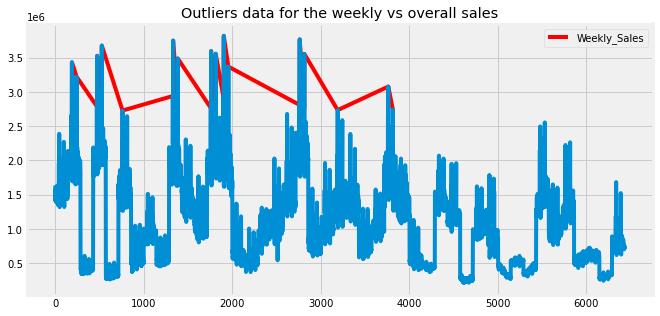

In [30]:
find_outlier_rows(df, 'Weekly_Sales')['Weekly_Sales'].plot(figsize=(10,5), 
                                                           legend = True, 
                                                           title = 'Outliers data for the weekly vs overall sales', 
                                                           color='r')
df['Weekly_Sales'].plot()

plt.show() # to avoid the noise

#### Numbers of Stores

In [31]:
# checking the number of weekly_sales entries for each stores
sum = 0

for i in range(1,46):
  
  x = df[df['Store'] == i].shape[0]
  print(f"Total number of sales available for Store_{i}: {x}");
  sum = sum + x

print(f"Sum of all the enteries: {sum}")


Total number of sales available for Store_1: 143
Total number of sales available for Store_2: 143
Total number of sales available for Store_3: 143
Total number of sales available for Store_4: 143
Total number of sales available for Store_5: 143
Total number of sales available for Store_6: 143
Total number of sales available for Store_7: 143
Total number of sales available for Store_8: 143
Total number of sales available for Store_9: 143
Total number of sales available for Store_10: 143
Total number of sales available for Store_11: 143
Total number of sales available for Store_12: 143
Total number of sales available for Store_13: 143
Total number of sales available for Store_14: 143
Total number of sales available for Store_15: 143
Total number of sales available for Store_16: 143
Total number of sales available for Store_17: 143
Total number of sales available for Store_18: 143
Total number of sales available for Store_19: 143
Total number of sales available for Store_20: 143
Total num

In [145]:
df['Store'].nunique()

45

Inference: The datasets seems that sales is already been resampled on weekly basis. Total numbers of stores are 45 and each store have equal sales entries.

# 2. Exploratory Data Analysis (EDA)

### Analyzing All Features Data Distribution

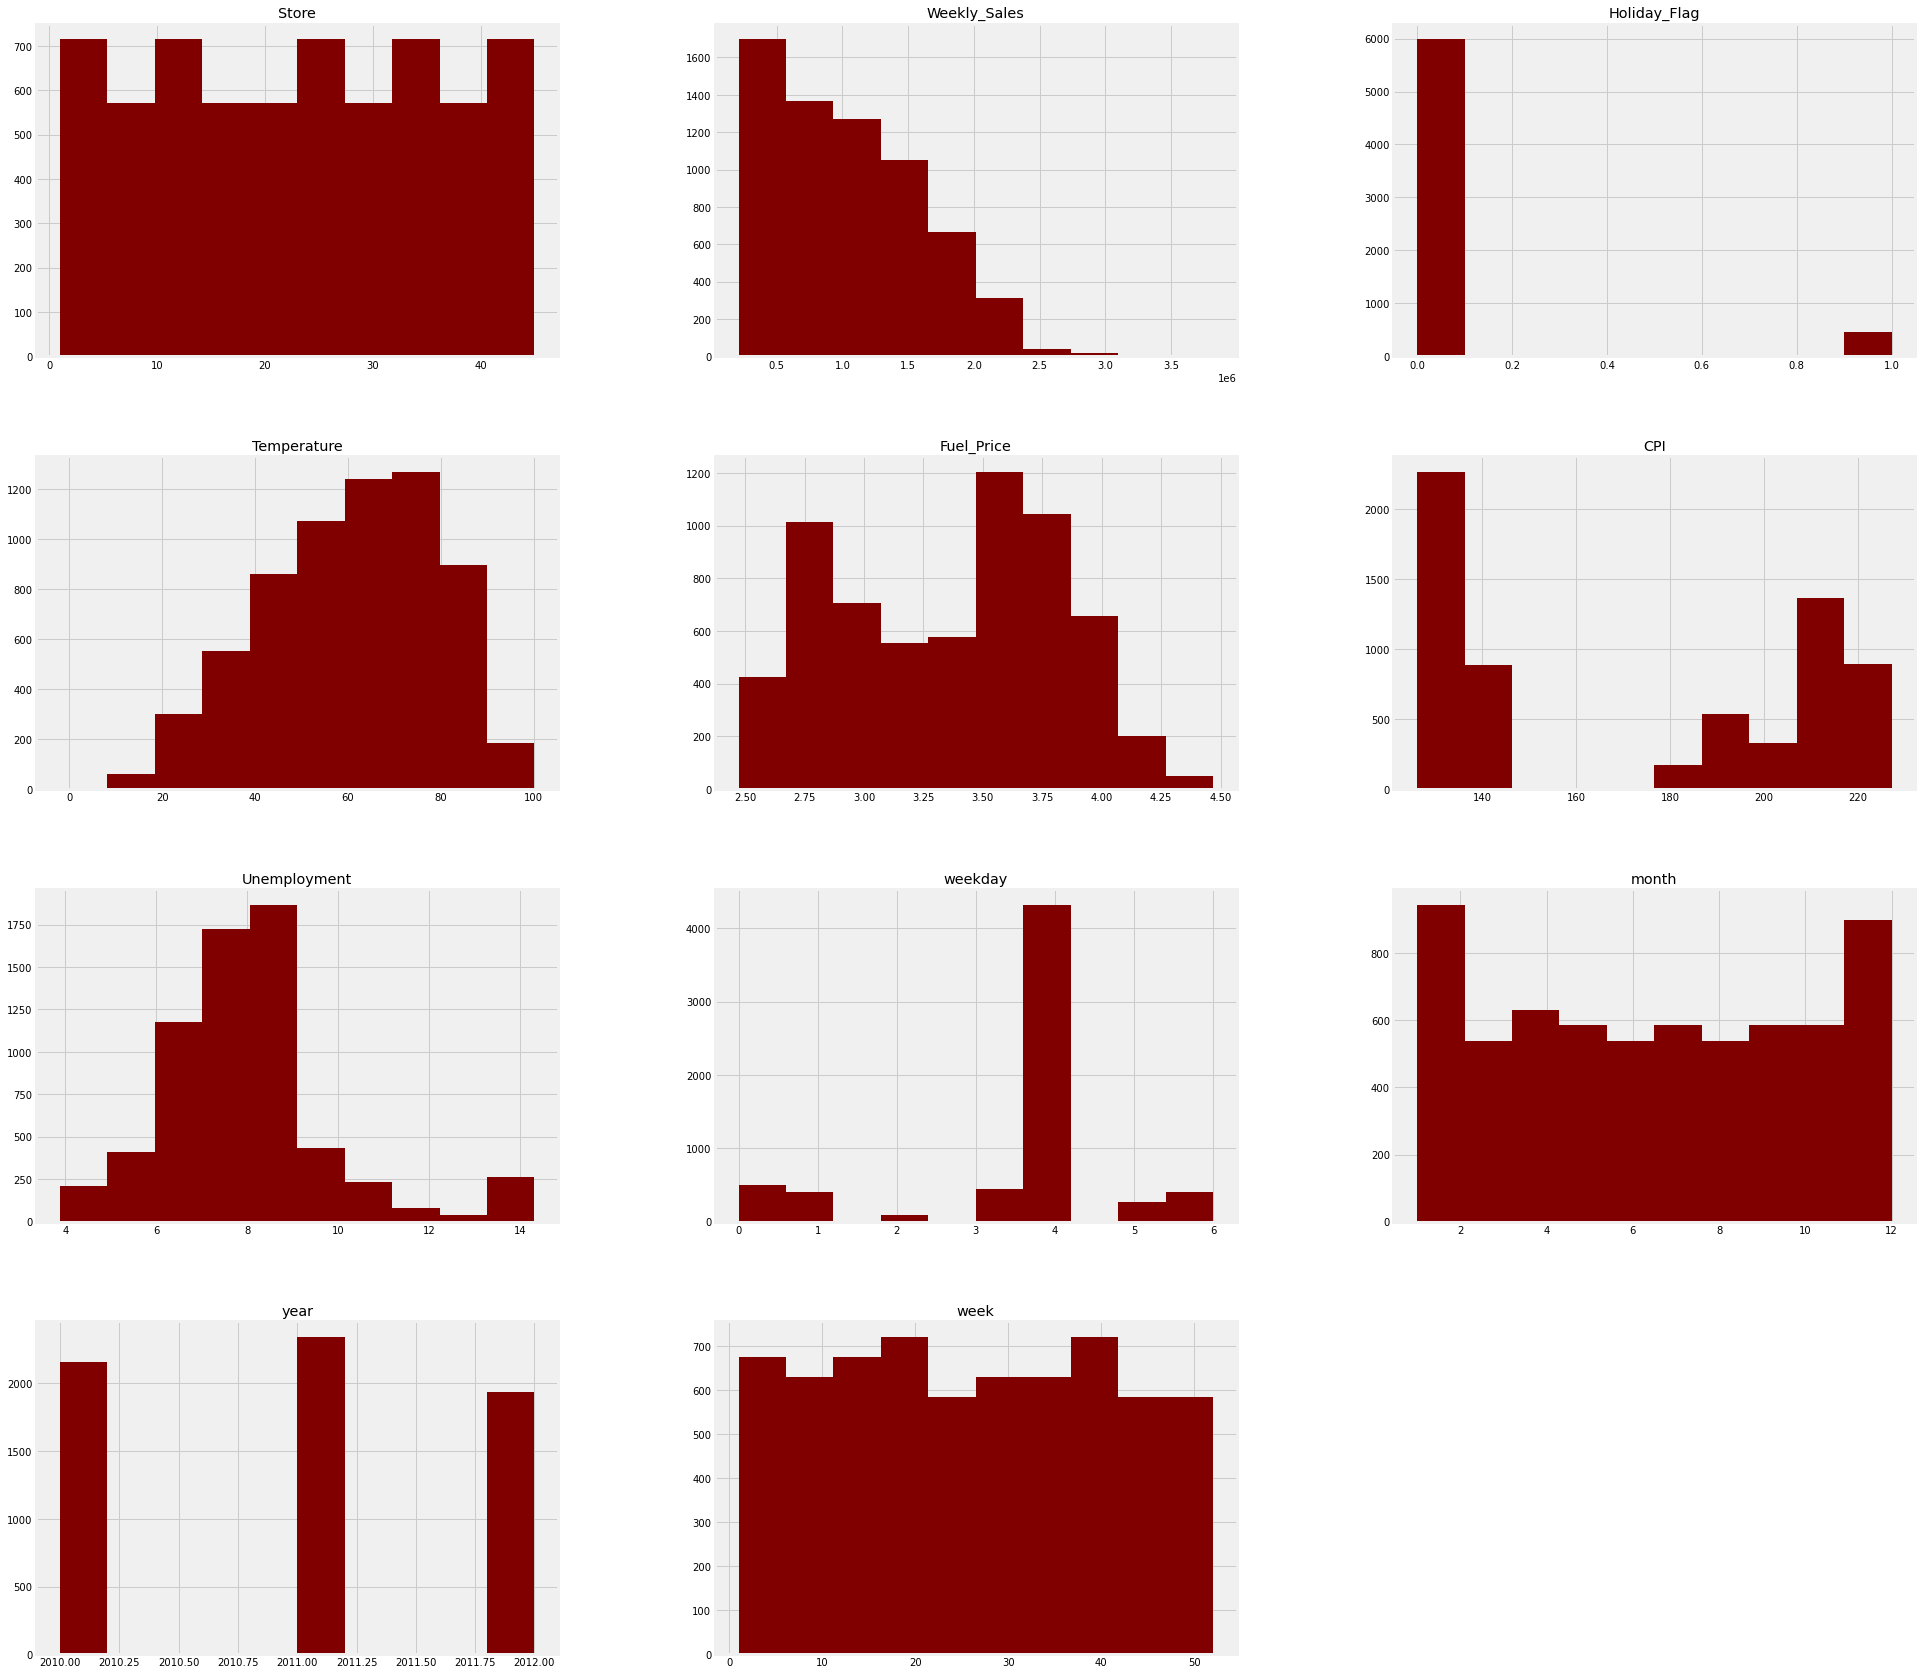

In [32]:
# plotting histogram for the overall distribution

df.hist(figsize=(30,30), color='maroon')
plt.show()

Inference:

From the above histograms, we can understand that:

The number of transactions occurred almost evenly across various stores and years.
The distribution of weekly_sales right-skewed. Only a few of the weekly sales are above 2 million USD.
The distribution of temperature is approximately normal.
The distribution of fuel_price is bi-modal.
CPI formed two clusters.
Unemployment rate is near normally distributed.
Four consecutive months November-February recorded the highest sales.

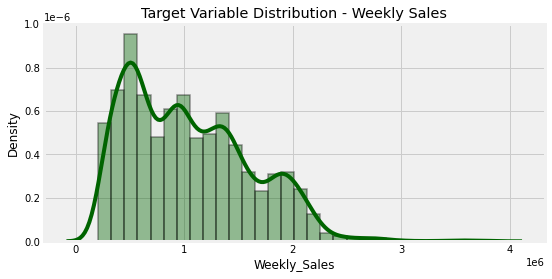

In [33]:
#Let us first analyze the distribution of the target variable

plt.figure(figsize=[8,4])
sns.distplot(df[target], color='darkgreen',hist_kws=dict(edgecolor="black", linewidth=1.5), bins=30)
plt.title('Target Variable Distribution - Weekly Sales')
plt.show()

Inference: The Target Variable seems to be be normally distributed, averaging around 20 units.

                                                Numeric Features Distribution                                                 


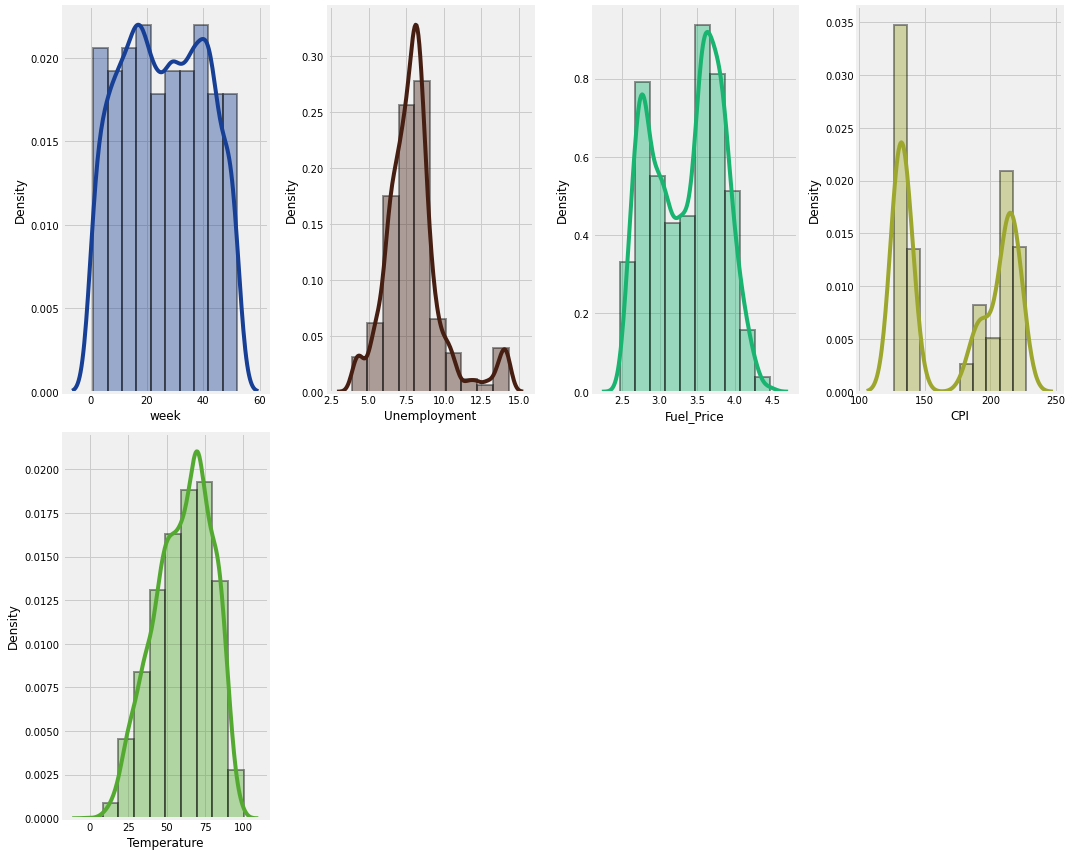

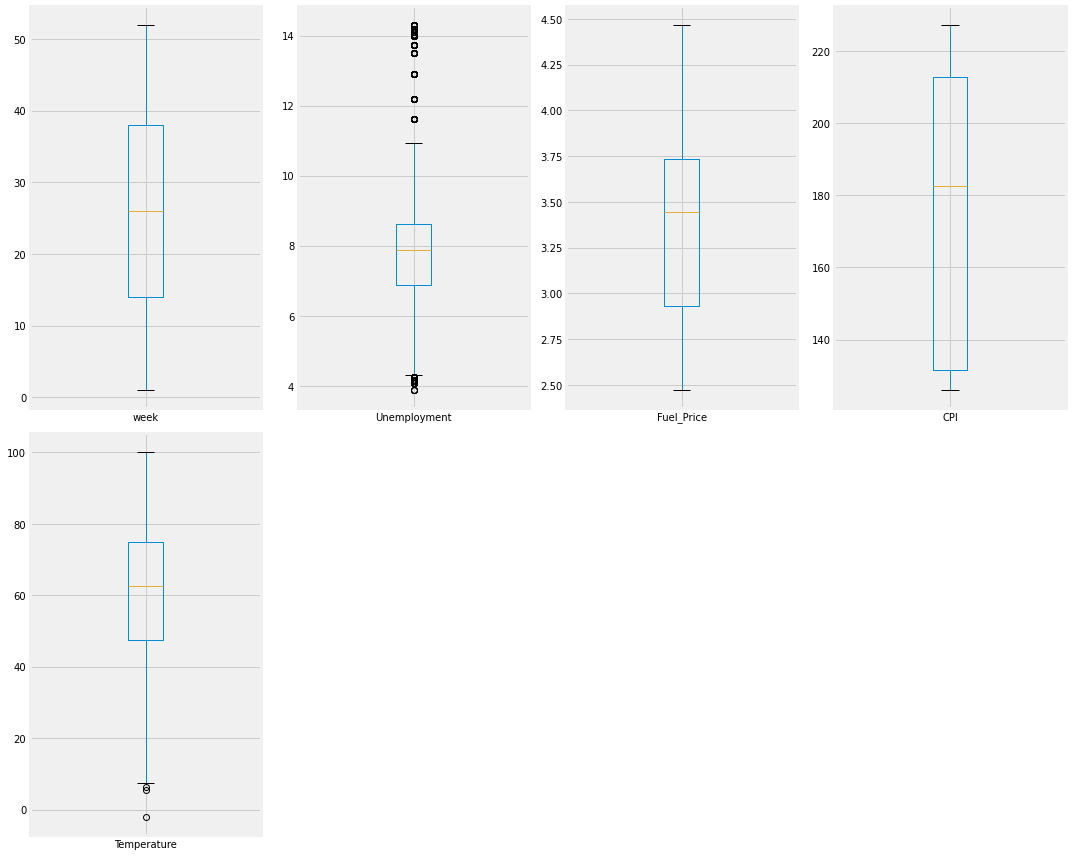

In [34]:
#Visualising the numeric features 

print('\033[1mNumeric Features Distribution'.center(130))

n=4

clr=['r','g','b','g','b','r']

plt.figure(figsize=[15,6*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    sns.distplot(df[nf[i]],hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=list(np.random.randint([255,255,255])/255))
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,6*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    df.boxplot(nf[i])
plt.tight_layout()
plt.show()

Inference: There seem to be some outliers.

### Analyzing Average sales distribution of each year

In [35]:
store_dept_table = pd.pivot_table(df, index='Store', columns='year',
                                  values='Weekly_Sales', aggfunc=np.mean)
display(store_dept_table)

year,2010,2011,2012
Store,,,
1,1.526642e+06,1.556191e+06,1.586094e+06
2,1.984956e+06,1.896305e+06,1.895272e+06
3,3.905296e+05,4.003245e+05,4.191730e+05
4,1.993343e+06,2.136390e+06,2.157470e+06
5,3.090840e+05,3.167465e+05,3.295079e+05
6,1.602340e+06,1.548630e+06,1.542210e+06
7,5.326683e+05,5.896662e+05,5.899432e+05
8,9.000932e+05,9.137074e+05,9.124167e+05
9,5.235254e+05,5.516533e+05,5.575356e+05


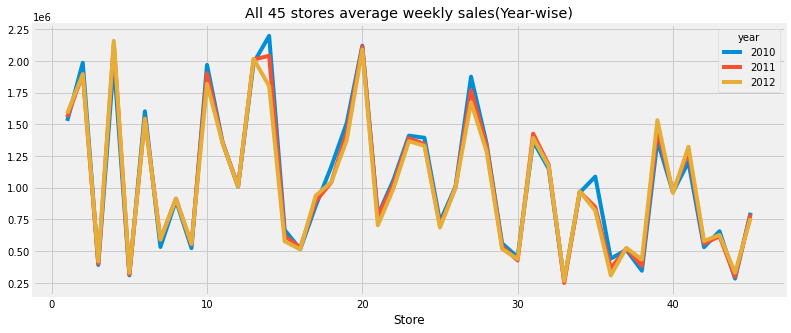

In [36]:
store_dept_table.plot(figsize=(12,5), title='All 45 stores average weekly sales(Year-wise)');

#### Holiday based sales analysis

In [37]:
holiday_sales = df.groupby('Holiday_Flag').sum().reset_index()

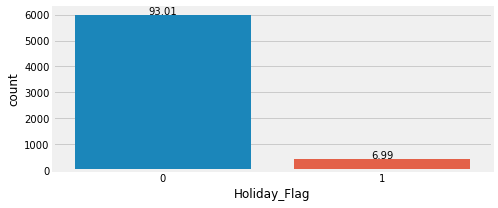

In [38]:
# sales distribution as per the 'Holiday_Flag' column

plt.figure(figsize=(7,3))

total = float(len(df["Weekly_Sales"]) )

ax = sns.countplot(x="Holiday_Flag", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.show()

In [39]:
# checking the average sales during the holiday
display(df.groupby('Holiday_Flag')['Weekly_Sales'].mean().astype('float32'))

sales_difference = 1122887.875 - 1041256.375

print(f"Overall holiday count : \n{df.Holiday_Flag.value_counts()}\n");
print(f"Sales difference during holiday & and non-holiday dates : {sales_difference}")


Holiday_Flag
0    1041256.375
1    1122887.875
Name: Weekly_Sales, dtype: float32

Overall holiday count : 
0    5985
1     450
Name: Holiday_Flag, dtype: int64

Sales difference during holiday & and non-holiday dates : 81631.5


### Average Yearly Sales per Store

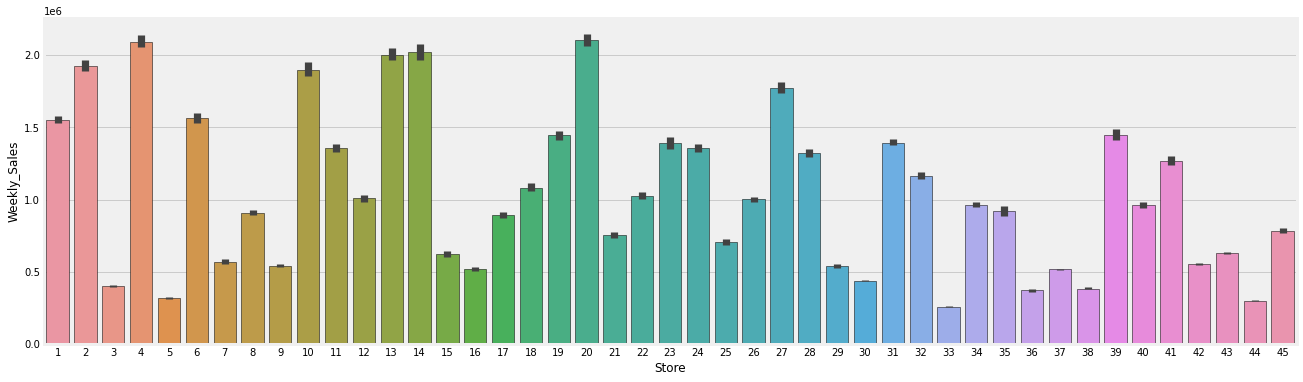

In [40]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='Store', y='Weekly_Sales', data=df, edgecolor="black")

In [41]:
df.groupby('year')['Weekly_Sales'].mean() # to see the best years for sales

year
2010    1.059670e+06
2011    1.046239e+06
2012    1.033660e+06
Name: Weekly_Sales, dtype: float64

### Monthly sales per store

<AxesSubplot:xlabel='month'>

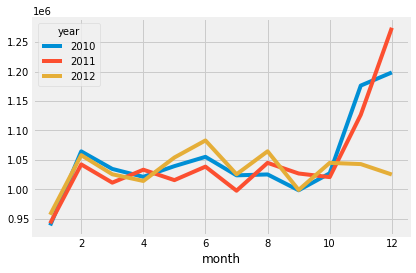

In [42]:
monthly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "year", index = "month")
monthly_sales.plot()

Inference: From the graph, it is seen that 2010 has lower sales than 2011 generally. When we look at the mean sales it is seen that 2010 has higher values, however, 2012 has no information about November and December months, which have higher sales then other months. Despite of 2012 has no sales for the last two months and it's average sales is comparetively equals to 2010. O, we can observe that the sales over the year 2012 are greater then other two years sales.

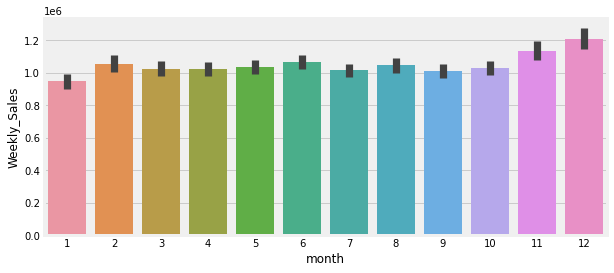

In [43]:
plt.figure(figsize=(9,4))
fig = sns.barplot(x='month', y='Weekly_Sales', data=df)

In [44]:
df.groupby('week')['Weekly_Sales'].mean().sort_values(ascending=False).head()

week
51    1.754774e+06
47    1.471273e+06
50    1.244704e+06
23    1.133040e+06
7     1.090298e+06
Name: Weekly_Sales, dtype: float64

##### Weekly sales per store (each year)

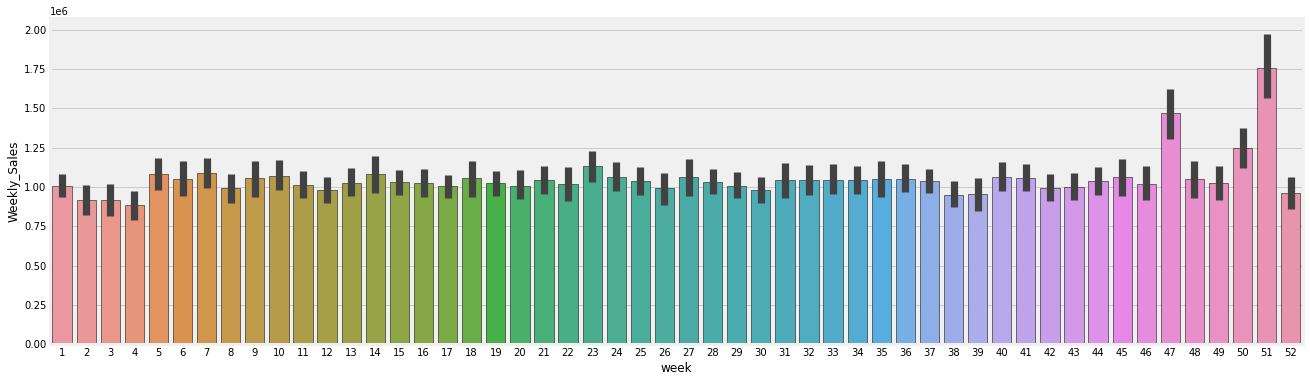

In [45]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='week', y='Weekly_Sales', data=df, edgecolor='black')
plt.show()

### The highest and lowest average revenues over the years

In [46]:
sales_store = df.groupby('Store').sum().reset_index()

top_sales_store = sales_store.sort_values('Weekly_Sales',ascending=False).head()[['Store','Weekly_Sales']]
bottom_sales_store = sales_store.sort_values('Weekly_Sales',ascending=True).head()[['Store','Weekly_Sales']]

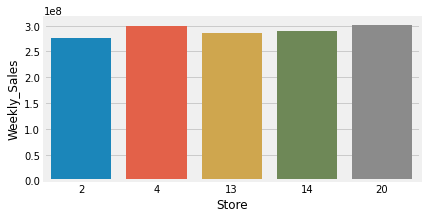

In [47]:
plt.figure(figsize=(6,3))
sns.barplot(x='Store',y='Weekly_Sales',data=top_sales_store)
plt.show()

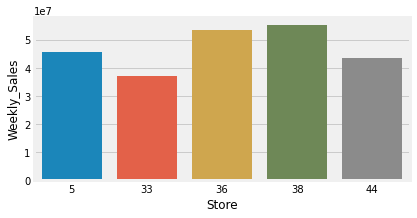

In [48]:
plt.figure(figsize=(6,3))
sns.barplot(x='Store',y='Weekly_Sales',data=bottom_sales_store)
plt.show()

# Overall trend in sales over time

In [49]:
display(original_df)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-05-02,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-12-02,1,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106
2010-05-03,1,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...
2012-09-28,45,713173.95,0,64.88,3.997,192.013558,8.684
2012-05-10,45,733455.07,0,64.89,3.985,192.170412,8.667
2012-12-10,45,734464.36,0,54.47,4.000,192.327265,8.667


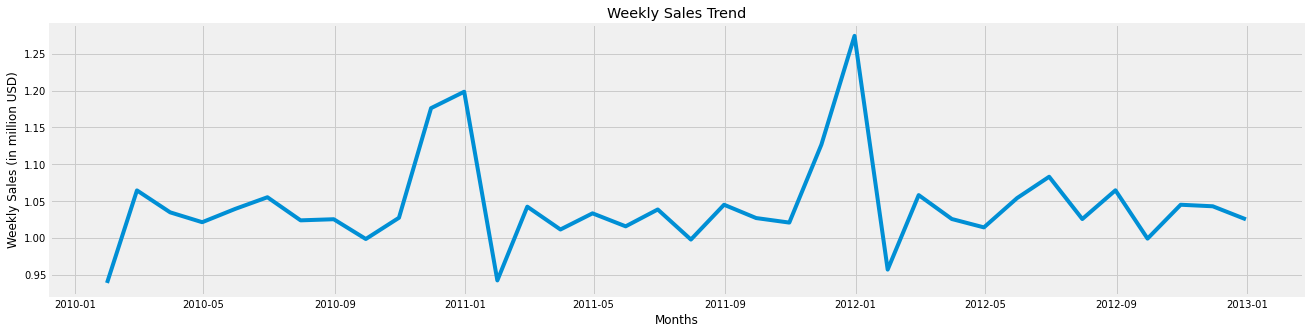

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert the index to datetime format to ensure unique values
original_df.index = pd.to_datetime(original_df.index)

plt.figure(figsize=(20, 5))

# Use groupby and resample to get the mean of Weekly_Sales per month
monthly_sales = original_df.resample('M').mean()

# Plotting the line chart
sns.lineplot(x=monthly_sales.index, y=(monthly_sales.Weekly_Sales/1e6))

plt.xlabel('Months')
plt.ylabel('Weekly Sales (in million USD)')
plt.title('Weekly Sales Trend')

plt.show()


In [51]:
len(original_df.Weekly_Sales)

6435

##### Fuel Price, CPI , Unemployment , Temperature Effects

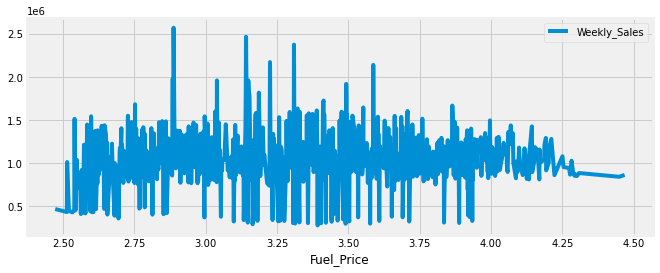

In [52]:
fuel_price = pd.pivot_table(df, values = "Weekly_Sales", index= "Fuel_Price")
fuel_price.plot(figsize=(10,4))
plt.show()

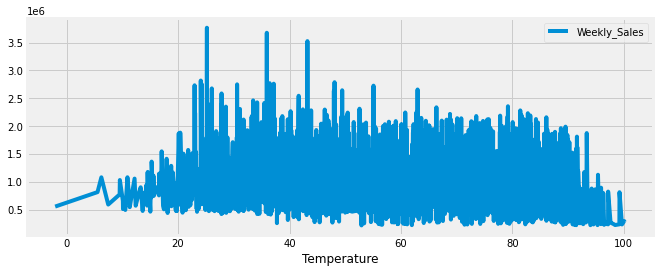

In [53]:
temp = pd.pivot_table(df, values = "Weekly_Sales", index= "Temperature")
temp.plot(figsize=(10,4))
plt.show()

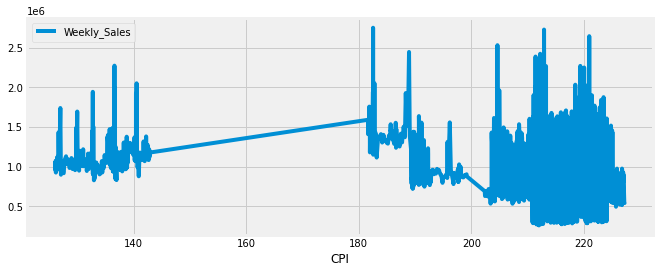

In [54]:
CPI = pd.pivot_table(df, values = "Weekly_Sales", index= "CPI")
CPI.plot(figsize=(10,4))
plt.show()

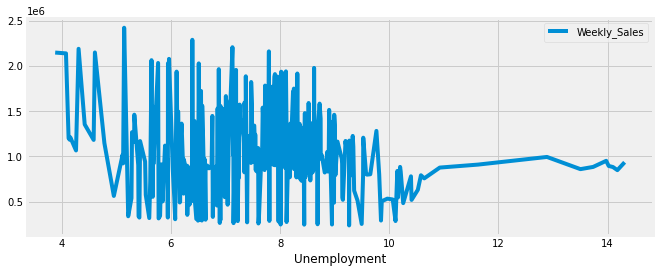

In [55]:
unemployment = pd.pivot_table(df, values = "Weekly_Sales", index= "Unemployment")
unemployment.plot(figsize=(10,4))
plt.show()

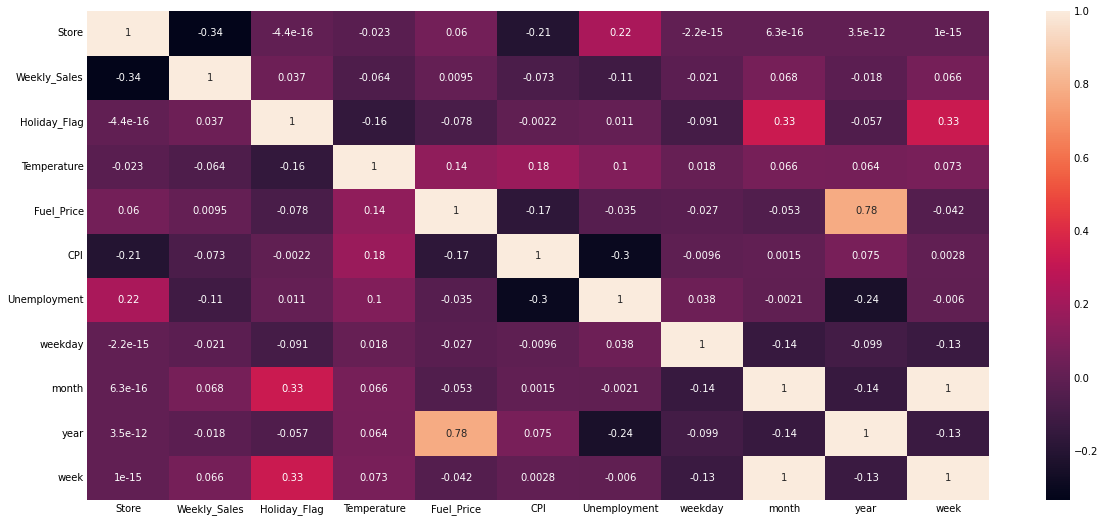

In [56]:
plt.figure(figsize=(18,9))
sns.heatmap(df.corr(), annot=True);

### Overall findings and explorations

## There are 45 stores and each stores have 143 enteries.
Although stores 10 and 35 have higher weekly sales values sometimes, in general average store 20 and store 4 are on the first and second rank. It means that some areas has higher seasonal sales.
Also, ir seems that the stores having larger sells are bigger and covers a populated area with huge number of users. According to different factors, sales of the stores are changing.
As expected, holiday average sales are higher than normal dates.
Christmas holiday introduces as the last days of the year. But people generally shop at 51th week. So, when we look at the total sales of holidays, Thankgiving has higher sales between them which was assigned by Walmart.
Year 2010 has higher sales than 2011 and 2012. But, November and December sales are not in the data for 2012. Even without highest sale months, 2012 is not significantly less than 2010, so after adding last two months, it can be first.
It is obviously seen that week 51 and 47 have higher values and 50-48 weeks follow them. Interestingly, 5th top sales belongs to 22th week of the year. This results show that Christmas, Thankgiving and Black Friday are very important than other weeks for sales and 5th important time is 22th week of the year and it is end of the May, when schools are closed. Most probably, people are preparing for holiday at the end of the May.
January sales are significantly less than other months. This is the result of November and December high sales. After two high sales month, people prefer to pay less on January.
CPI, temperature, unemployment rate and fuel price have no pattern on weekly sales.

# 3. Data Pre-processing

In [57]:
# using 'original_df' dataset which have Date column as index for the Time Series analysis 
original_df.rename(columns = {'Store':'store','Weekly_Sales':'weekly_sales'}, inplace = True) #renaming the columns into sma

In [58]:

display(original_df.sort_values(by=['Date', 'store']).head(15))

,store,weekly_sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-01-10,1,1453329.50,0,71.89,2.603,211.671989,7.838
2010-01-10,2,1827440.43,0,69.24,2.603,211.329874,8.163
2010-01-10,3,358784.10,0,73.60,2.603,214.984655,7.564
2010-01-10,4,1842821.02,0,63.96,2.619,126.234600,7.127
2010-01-10,5,283178.12,0,71.10,2.603,212.226946,6.768
2010-01-10,6,1328468.89,0,70.69,2.603,213.190713,7.007
2010-01-10,7,448998.73,0,49.99,2.759,190.673824,9.137
2010-01-10,8,804105.49,0,68.70,2.603,215.031003,6.433
2010-01-10,9,495692.19,0,69.08,2.603,215.214134,6.560


In [59]:
original_df.head(12)

,store,weekly_sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-05-02,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-12-02,1,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106
2010-05-03,1,1554806.68,0,46.50,2.625,211.350143,8.106
2010-12-03,1,1439541.59,0,57.79,2.667,211.380643,8.106
2010-03-19,1,1472515.79,0,54.58,2.720,211.215635,8.106
2010-03-26,1,1404429.92,0,51.45,2.732,211.018042,8.106
2010-02-04,1,1594968.28,0,62.27,2.719,210.820450,7.808


## Creating a time based dataset for all 45 stores

In [60]:
# creatin a store-wise sales dataframe for the time series analysis
ts_df = pd.DataFrame()

for i in range(1,46):
    col_name = 'store_' + str(i)
    ts_df[col_name] = original_df[original_df['store'] == i]['weekly_sales']

In [61]:
ts_df.head(12)

,store_1,store_2,store_3,store_4,store_5,store_6,store_7,store_8,store_9,store_10,...,store_36,store_37,store_38,store_39,store_40,store_41,store_42,store_43,store_44,store_45
Date,,,,,,,,,,,,,,,,,,,,,
2010-05-02,1643690.90,2136989.46,461622.22,2135143.87,317173.10,1652635.10,496725.44,1004137.09,549505.55,2193048.75,...,467546.74,536006.73,358496.14,1230596.80,1001943.80,1086533.18,543384.01,647029.28,281090.95,890689.51
2010-12-02,1641957.44,2137809.50,420728.96,2188307.39,311825.70,1606283.86,524104.92,994801.40,552677.48,2176028.52,...,469563.70,529852.70,342214.90,1266229.07,955338.29,1075656.34,575709.96,682918.99,286857.13,656988.64
2010-02-19,1611968.17,2124451.54,421642.19,2049860.26,303447.57,1567138.07,506760.54,963960.37,511327.90,2113432.58,...,470281.03,510382.50,327237.92,1230591.97,916289.20,1052034.74,508794.87,658997.55,267956.30,841264.04
2010-02-26,1409727.59,1865097.27,407204.86,1925728.84,270281.63,1432953.21,496083.24,847592.11,473773.27,2006774.96,...,447519.44,513615.82,334222.73,1168582.02,863917.41,991941.73,491510.58,618702.79,273079.07,741891.65
2010-05-03,1554806.68,1991013.13,415202.04,1971057.44,288855.71,1601348.82,491419.55,881503.95,507297.88,1987090.09,...,480203.43,519255.68,372239.89,1266254.21,990152.28,1063557.49,554972.42,658600.05,284617.27,777951.22
2010-12-03,1439541.59,1990483.78,384200.69,1894324.09,297293.59,1558621.36,480452.10,860336.16,494145.80,1941346.13,...,441434.20,513015.35,342023.92,1244391.83,899352.40,1023997.71,588363.62,645386.94,272190.83,765687.42
2010-03-19,1472515.79,1946070.88,375328.59,1897429.36,281706.41,1693058.91,574450.23,839911.00,485744.61,1946875.06,...,428851.99,460020.74,333025.47,1301590.13,894865.30,1006597.69,519914.10,668098.49,269624.20,773819.49
2010-03-26,1404429.92,1750197.81,359949.27,1762539.30,273282.97,1472033.38,514731.60,772539.12,484946.56,1893532.46,...,404438.51,515777.97,335858.11,1235094.66,873354.58,1015196.46,478021.68,623097.93,276279.49,782563.38
2010-02-04,1594968.28,2066187.72,423294.40,1979247.12,331406.00,1770333.90,561145.14,914500.91,545206.32,2138651.97,...,435972.82,540189.70,368929.55,1463942.62,1041202.13,1168826.39,505907.41,650102.80,286197.50,877235.96


In [62]:
# creating a columns having sum of the sales in a week
col_list = ts_df.columns
ts_df['total_weekly_sales'] = ts_df[col_list].sum(axis=1)

ts_df.head()

,store_1,store_2,store_3,store_4,store_5,store_6,store_7,store_8,store_9,store_10,...,store_37,store_38,store_39,store_40,store_41,store_42,store_43,store_44,store_45,total_weekly_sales
Date,,,,,,,,,,,,,,,,,,,,,
2010-05-02,1643690.90,2136989.46,461622.22,2135143.87,317173.10,1652635.10,496725.44,1004137.09,549505.55,2193048.75,...,536006.73,358496.14,1230596.80,1001943.80,1086533.18,543384.01,647029.28,281090.95,890689.51,49750740.50
2010-12-02,1641957.44,2137809.50,420728.96,2188307.39,311825.70,1606283.86,524104.92,994801.40,552677.48,2176028.52,...,529852.70,342214.90,1266229.07,955338.29,1075656.34,575709.96,682918.99,286857.13,656988.64,48336677.63
2010-02-19,1611968.17,2124451.54,421642.19,2049860.26,303447.57,1567138.07,506760.54,963960.37,511327.90,2113432.58,...,510382.50,327237.92,1230591.97,916289.20,1052034.74,508794.87,658997.55,267956.30,841264.04,48276993.78
2010-02-26,1409727.59,1865097.27,407204.86,1925728.84,270281.63,1432953.21,496083.24,847592.11,473773.27,2006774.96,...,513615.82,334222.73,1168582.02,863917.41,991941.73,491510.58,618702.79,273079.07,741891.65,43968571.13
2010-05-03,1554806.68,1991013.13,415202.04,1971057.44,288855.71,1601348.82,491419.55,881503.95,507297.88,1987090.09,...,519255.68,372239.89,1266254.21,990152.28,1063557.49,554972.42,658600.05,284617.27,777951.22,46871470.30


### Data Cross-Validation

In [63]:
train = ts_df.loc[ts_df.index < '2011-12-01']
test = ts_df.loc[ts_df.index >= '2011-12-01']

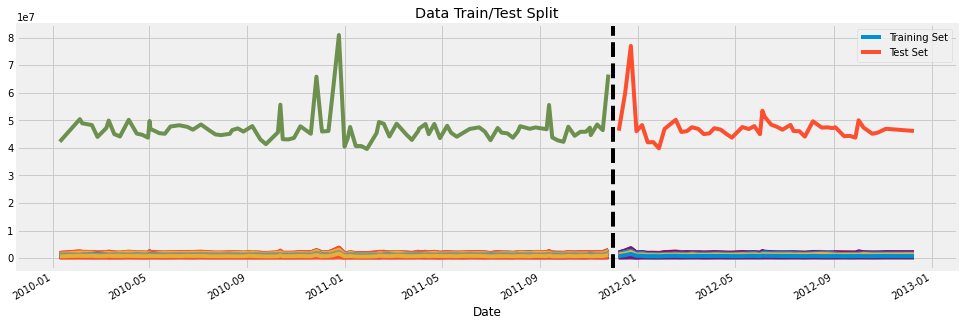

In [64]:
fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('2011-12-01', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [65]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits=5, test_size=7*2, gap=0)
ts_df = ts_df.sort_index()

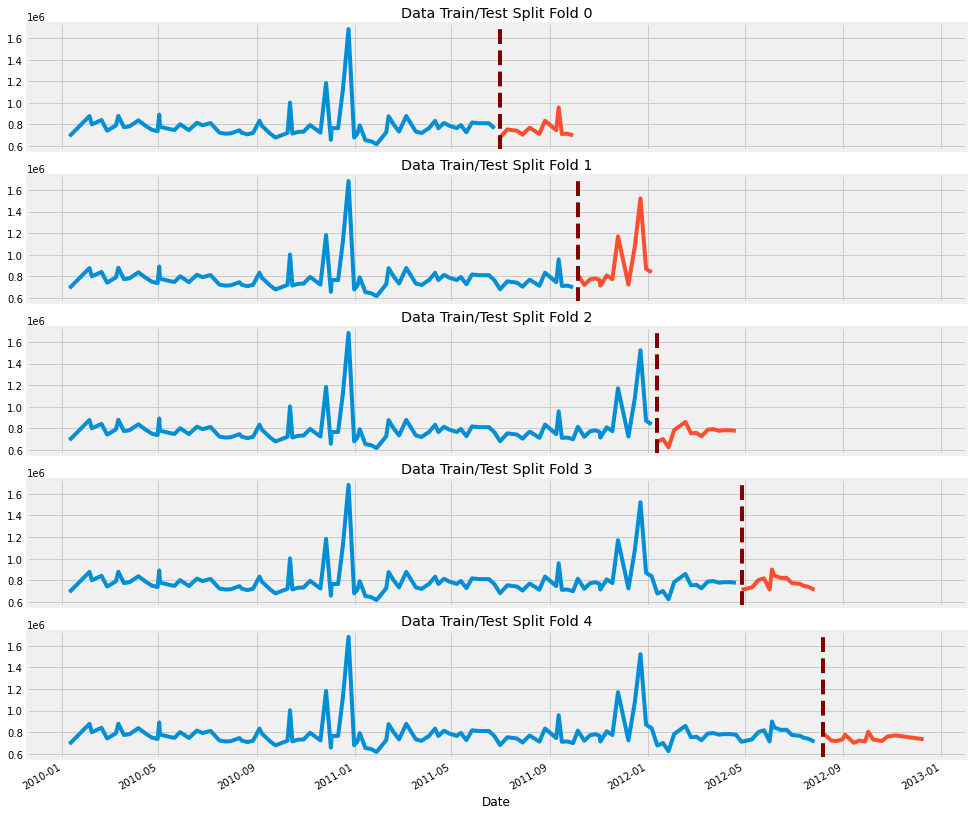


Inference: Here, I have checked and cross-validated the data after preprocessing, and found that their we have no leakage, 
however, already we have less data for the sales of each store so no chance any intersection or leakage in it.

Further, No more manipulation required.



In [66]:
# Define the ANSI escape sequence for bold text
class bcolors:
    BOLD = '\033[1m'
    END = '\033[0m'

fig, axs = plt.subplots(5, 1, figsize=(15, 15), sharex=True)

# ts_df = ts_df.astype('int64')
fold = 0
for train_idx, val_idx in tss.split(ts_df):
    train = ts_df.iloc[train_idx]
    test = ts_df.iloc[val_idx]
    train['store_45'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    test['store_45'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(test.index.min(), color='maroon', ls='--')
    fold += 1
plt.show()

print(f'''
{bcolors.BOLD}Inference:{bcolors.END} Here, I have checked and cross-validated the data after preprocessing, and found that their we have no leakage, 
however, already we have less data for the sales of each store so no chance any intersection or leakage in it.

Further, No more manipulation required.
''')


### 4. Feature Creation/Selection/Extraction

##### 4.1 Creating features on the basis of date time

In [67]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

ts_df_new = create_features(ts_df)
ts_df_new.head()

,store_1,store_2,store_3,store_4,store_5,store_6,store_7,store_8,store_9,store_10,...,store_44,store_45,total_weekly_sales,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-10,1453329.50,1827440.43,358784.10,1842821.02,283178.12,1328468.89,448998.73,804105.49,495692.19,1645892.97,...,300152.45,690007.76,42239875.87,6,1,1,2010,10,10,1
2010-02-04,1594968.28,2066187.72,423294.40,1979247.12,331406.00,1770333.90,561145.14,914500.91,545206.32,2138651.97,...,286197.50,877235.96,50423831.26,3,1,2,2010,35,4,5
2010-02-07,1492418.14,2003940.64,381151.72,1881337.21,305993.27,1759777.25,575570.77,852333.75,528832.54,1845893.87,...,300628.19,800147.84,48917484.50,6,1,2,2010,38,7,5
2010-02-19,1611968.17,2124451.54,421642.19,2049860.26,303447.57,1567138.07,506760.54,963960.37,511327.90,2113432.58,...,267956.30,841264.04,48276993.78,4,1,2,2010,50,19,7
2010-02-26,1409727.59,1865097.27,407204.86,1925728.84,270281.63,1432953.21,496083.24,847592.11,473773.27,2006774.96,...,273079.07,741891.65,43968571.13,4,1,2,2010,57,26,8


In [68]:
ts_df_new.to_csv('walmart_store.csv')

##### 4.2 Creating Lag Features

In [69]:
ts_df_new.columns

Index(['store_1', 'store_2', 'store_3', 'store_4', 'store_5', 'store_6',
       'store_7', 'store_8', 'store_9', 'store_10', 'store_11', 'store_12',
       'store_13', 'store_14', 'store_15', 'store_16', 'store_17', 'store_18',
       'store_19', 'store_20', 'store_21', 'store_22', 'store_23', 'store_24',
       'store_25', 'store_26', 'store_27', 'store_28', 'store_29', 'store_30',
       'store_31', 'store_32', 'store_33', 'store_34', 'store_35', 'store_36',
       'store_37', 'store_38', 'store_39', 'store_40', 'store_41', 'store_42',
       'store_43', 'store_44', 'store_45', 'total_weekly_sales', 'dayofweek',
       'quarter', 'month', 'year', 'dayofyear', 'dayofmonth', 'weekofyear'],
      dtype='object')

In [70]:
FEATURES = ['dayofweek',
       'quarter', 'month', 'year', 'dayofyear', 'dayofmonth', 'weekofyear']
TARGET = 'store_1'

# creating a dataframe for the store_1 to tarain the model
ts_df_store_1 = pd.DataFrame()
ts_df_store_1[TARGET] = ts_df_new['store_1']
ts_df_store_1[FEATURES] = ts_df_new[FEATURES]

ts_df_store_1.head()

,store_1,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,
2010-01-10,1453329.50,6,1,1,2010,10,10,1
2010-02-04,1594968.28,3,1,2,2010,35,4,5
2010-02-07,1492418.14,6,1,2,2010,38,7,5
2010-02-19,1611968.17,4,1,2,2010,50,19,7
2010-02-26,1409727.59,4,1,2,2010,57,26,8


In [71]:
def add_lags(df):
    df['lag1'] = df['store_1'] - df['store_1'].shift(1)
    df['lag2'] = df['store_1'] - df['store_1'].shift(2)
    df['lag3'] = df['store_1'] - df['store_1'].shift(3)
    
    return df

ts_df_store_1 = add_lags(ts_df_store_1)
ts_df_store_1.head()

,store_1,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,lag1,lag2,lag3
Date,,,,,,,,,,,
2010-01-10,1453329.50,6,1,1,2010,10,10,1,NaN,NaN,NaN
2010-02-04,1594968.28,3,1,2,2010,35,4,5,141638.78,NaN,NaN
2010-02-07,1492418.14,6,1,2,2010,38,7,5,-102550.14,39088.64,NaN
2010-02-19,1611968.17,4,1,2,2010,50,19,7,119550.03,16999.89,158638.67
2010-02-26,1409727.59,4,1,2,2010,57,26,8,-202240.58,-82690.55,-185240.69


In [72]:
ts_df_store_1['lag1'] = ts_df_store_1['lag1'].fillna(ts_df_store_1['lag1'].median())
ts_df_store_1['lag2'] = ts_df_store_1['lag2'].fillna(ts_df_store_1['lag2'].median())
ts_df_store_1['lag3'] = ts_df_store_1['lag3'].fillna(ts_df_store_1['lag3'].median())

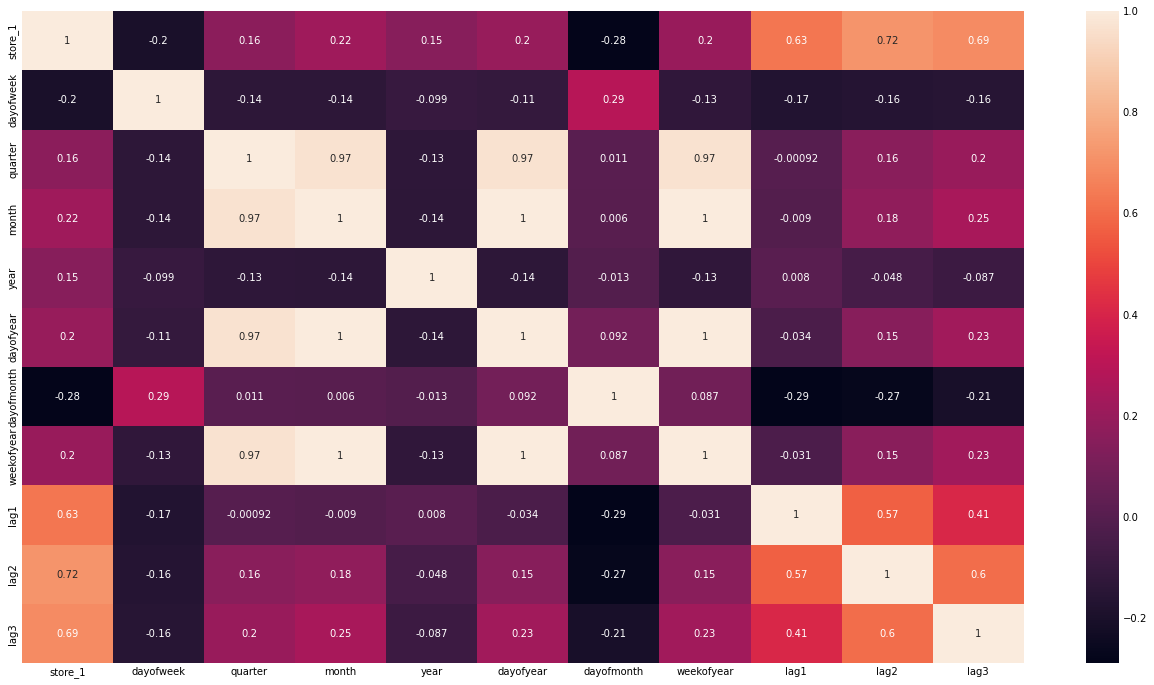

In [73]:
plt.figure(figsize=(20,12))
sns.heatmap(ts_df_store_1.corr(), annot=True);

In [74]:
ts_df_store_1['weekofyear'] = ts_df_store_1['weekofyear'].astype("int64")
ts_df_store_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143 entries, 2010-01-10 to 2012-12-10
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   store_1     143 non-null    float64
 1   dayofweek   143 non-null    int64  
 2   quarter     143 non-null    int64  
 3   month       143 non-null    int64  
 4   year        143 non-null    int64  
 5   dayofyear   143 non-null    int64  
 6   dayofmonth  143 non-null    int64  
 7   weekofyear  143 non-null    int64  
 8   lag1        143 non-null    float64
 9   lag2        143 non-null    float64
 10  lag3        143 non-null    float64
dtypes: float64(4), int64(7)
memory usage: 13.4 KB


## 5. Predictive Modelling with Regressor algorithms and sales forecasting

In [75]:
ts_df_store_1

,store_1,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,lag1,lag2,lag3
Date,,,,,,,,,,,
2010-01-10,1453329.50,6,1,1,2010,10,10,1,-12190.705,-27868.15,20996.285
2010-02-04,1594968.28,3,1,2,2010,35,4,5,141638.780,-27868.15,20996.285
2010-02-07,1492418.14,6,1,2,2010,38,7,5,-102550.140,39088.64,20996.285
2010-02-19,1611968.17,4,1,2,2010,50,19,7,119550.030,16999.89,158638.670
2010-02-26,1409727.59,4,1,2,2010,57,26,8,-202240.580,-82690.55,-185240.690
...,...,...,...,...,...,...,...,...,...,...,...
2012-10-08,1592409.97,0,4,10,2012,282,8,41,-210067.460,155350.71,86283.910
2012-10-19,1508068.77,4,4,10,2012,293,19,42,-84341.200,-294408.66,71009.510
2012-10-26,1493659.74,4,4,10,2012,300,26,43,-14409.030,-98750.23,-308817.690


##### 5.1 Fitting XGBRegressor Model

In [76]:
train = ts_df_store_1.loc[ts_df_store_1.index < '2011-12-01']
test = ts_df_store_1.loc[ts_df_store_1.index >= '2011-12-01']

tss = TimeSeriesSplit(n_splits=5, test_size=7*2, gap=0)
ts_df_store_1 = ts_df_store_1.sort_index()


fold = 0
preds = []
scores = []
for train_idx, val_idx in tss.split(ts_df_store_1):
    train = ts_df_store_1.iloc[train_idx]
    test = ts_df_store_1.iloc[val_idx]

    FEATURES = ['dayofweek', 'quarter', 'month', 'year', 'dayofyear',
       'dayofmonth', 'weekofyear', 'lag1', 'lag2', 'lag3']

    X_train = train[FEATURES]
    y_train = train[TARGET]

    X_test = test[FEATURES]
    y_test = test[TARGET]

    reg = xgb.XGBRegressor(base_score=0.75, booster='dart',    
                           n_estimators=1000,
                           early_stopping_rounds=50,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.01)
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)

[0]	validation_0-rmse:1520981.93368	validation_1-rmse:1493252.62707
[100]	validation_0-rmse:581258.84866	validation_1-rmse:549733.69157
[200]	validation_0-rmse:236977.00950	validation_1-rmse:214017.16268
[300]	validation_0-rmse:108826.89681	validation_1-rmse:97736.67231
[400]	validation_0-rmse:59210.71170	validation_1-rmse:56713.37481
[500]	validation_0-rmse:37676.43080	validation_1-rmse:49180.40747
[600]	validation_0-rmse:27152.93459	validation_1-rmse:48078.71742
[700]	validation_0-rmse:21551.01880	validation_1-rmse:47312.13815
[800]	validation_0-rmse:18491.06958	validation_1-rmse:46938.70490
[900]	validation_0-rmse:15930.27822	validation_1-rmse:46574.75537
[999]	validation_0-rmse:13489.06807	validation_1-rmse:46062.23951
[0]	validation_0-rmse:1516560.19475	validation_1-rmse:1658043.80195
[100]	validation_0-rmse:576849.69755	validation_1-rmse:721340.50500
[200]	validation_0-rmse:232170.78959	validation_1-rmse:356785.57244
[300]	validation_0-rmse:104982.24782	validation_1-rmse:235475.6

In [77]:
print(f'Score across folds {np.mean(scores):0.2f}')
print(f'Fold scores:{scores}')

Score across folds 71488.19
Fold scores:[46062.23373636142, 151599.41067687186, 61081.35940302419, 69070.30285656036, 29627.65375758507]


#### 5.1.2 Fitting XGBRegressor


In [78]:
FEATURES = FEATURES = ['dayofweek', 'quarter', 'month', 'year', 'dayofyear',
                       'dayofmonth', 'weekofyear', 'lag1', 'lag2', 'lag3']
TARGET = 'store_1'

X_all = ts_df_store_1[FEATURES]
y_all = ts_df_store_1[TARGET]

reg = xgb.XGBRegressor(base_score=0.75, booster='dart',    
                           n_estimators=1000,
                           early_stopping_rounds=50,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.01)
reg.fit(X_all, y_all,
        eval_set=[(X_all, y_all)],
        verbose=100)
y_pred = reg.predict(X_test)
score = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"\n\nRMSE of XGBRegressor: {score}")

[0]	validation_0-rmse:1547644.16465
[100]	validation_0-rmse:584466.91256
[200]	validation_0-rmse:230732.53402
[300]	validation_0-rmse:100845.78447
[400]	validation_0-rmse:53428.20462
[500]	validation_0-rmse:36491.68285
[600]	validation_0-rmse:29246.62281
[700]	validation_0-rmse:25304.94799
[800]	validation_0-rmse:22700.44188
[900]	validation_0-rmse:20304.63373
[999]	validation_0-rmse:18688.18881


RMSE of XGBRegressor: 13323.749100435454


In [79]:
print(f"The mean of the target columns: {np.mean(ts_df_store_1['store_1'])}")
print(f"The difference between the actual and predicted values: {9405.146862738415/1555264.3975524476}")

The mean of the target columns: 1555264.3975524476
The difference between the actual and predicted values: 0.006047297731202162


#### 5.1.3 Saving Model

In [80]:
import pickle

# Save the model using pickle
filename = 'xgb_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(reg, file)

### 5.2 Fitting Different Regressor Models

#### 5.2.1 Splitting & scaling the dataset

In [81]:
# scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_all)

# split the dataset into train and test sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X_scaled,y_all, test_size=0.2, random_state=50)

#### 5.2.2 Defining a function to fit the models

In [82]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    """
    Evaluate a model on training and test data.

    Parameters
    ----------
    model : object
        A scikit-learn estimator object.
    X_train : array-like or pd.DataFrame
        Training data with shape (n_samples, n_features).
    y_train : array-like
        Training labels with shape (n_samples,).
    X_test : array-like or pd.DataFrame
        Test data with shape (n_samples, n_features).
    y_test : array-like
        Test labels with shape (n_samples,).

    Returns
    -------
    rmse : float
        Root mean squared error between the test labels and the predictions.
    """
    # train
    model.fit(X_train, y_train)
    # predict
    y_pred = model.predict(X_test)
    # calculate MSE
    mse = mean_squared_error(y_test, y_pred)
    # calculate RMSE
    rmse = np.sqrt(mse)
    return rmse

## 5.2.3 Defining the function to evaluated our model

In [83]:
def evaluate_regressors_rmses(regressors, regressor_names, X_train, y_train, X_test, y_test):
    """
    This function takes a list of regressors, their names, and the training and test data as input
    and returns a dataframe with the names of the regressors and their root mean squared error (RMSE)
    on the test data.
    
    Parameters:
    -----------
    regressors (list): a list of scikit-learn compatible regression models
    regressor_names (list): a list of strings containing the names of the regression models
    X_train (pandas DataFrame): a pandas DataFrame containing the features for training the models
    y_train (pandas Series): a pandas Series containing the target values for training the models
    X_test (pandas DataFrame): a pandas DataFrame containing the features for testing the models
    y_test (pandas Series): a pandas Series containing the target values for testing the models
    
    Returns:
    --------
    pandas DataFrame: a dataframe containing the names of the regressors and their corresponding RMSE on the test data
    """
    
    # evaluate the models and compute their RMSE on the test data
    rmses = [evaluate_model(regressor, X_train, y_train, X_test, y_test) for regressor in regressors]
    
    # create a dictionary mapping the names of the regressors to their RMSE
    regressor_rmses = dict(zip(regressor_names, rmses))
    
    # convert the dictionary to a pandas dataframe
    df = pd.DataFrame.from_dict(regressor_rmses, orient='index')
    
    # reset the index of the dataframe
    df = df.reset_index()
    
    # rename the columns of the dataframe
    df.columns = ['regressor_name', 'rmse']
    
    # sort the dataframe by RMSE in ascending order
    return df.sort_values('rmse', ignore_index=True)

#### 5.2.4 Initialize the regressors models

In [84]:
# initialize the regressors
linear_regressor = LinearRegression(fit_intercept=False)
polynomial_features = PolynomialFeatures(degree=2)
polynomial_regressor = Pipeline([("polynomial_features", polynomial_features),
("linear_regression", linear_regressor)])
ridge_regressor = Ridge()
lasso_regressor = Lasso()
elastic_net_regressor = ElasticNet()
decision_tree_regressor = DecisionTreeRegressor()
random_forest_regressor = RandomForestRegressor()
boosted_tree_regressor = GradientBoostingRegressor(n_estimators=500,
                                                   random_state=42,
                                                   criterion='friedman_mse',
                                                   loss='huber',
                                                   min_samples_split=2,
                                                   min_impurity_decrease=0.75, alpha=0.5)
neural_network_regressor = MLPRegressor()
support_vector_regressor = SVR(coef0=0.5, kernel='linear')
grad_regressor = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, loss='ls')
knn_regressor = KNeighborsRegressor(n_neighbors=5, weights='uniform')
spline_regressor = make_pipeline(PolynomialFeatures(3), LinearRegression())

In [85]:
# collect the list of regressors
regressors = [linear_regressor, polynomial_regressor, ridge_regressor, lasso_regressor, elastic_net_regressor, 
              decision_tree_regressor, random_forest_regressor, boosted_tree_regressor, neural_network_regressor, 
              support_vector_regressor, knn_regressor, spline_regressor]

# collect the names of regressors
regressor_names = ["Linear Regression", "Polynomial Regression", "Ridge Regression", "Lasso Regression", 
                   "Elastic Net Regression", "Decision Tree Regression", "Random Forest Regression", 
                   "Boosted Tree Regression", "Neural Network Regression", "Support Vector Regression", 
                   "K-Nearest Neighbour Regression", "Spline Regression"]

#### 5.2.5 Model building and its results

In [86]:
print('\033[1m Table of regressors and their RMSEs')
evaluate_regressors_rmses(regressors, regressor_names, Xtrain, ytrain, Xtest, ytest)

 Table of regressors and their RMSEs


,regressor_name,rmse
0,Boosted Tree Regression,3.685584e+04
1,K-Nearest Neighbour Regression,5.039014e+04
2,Random Forest Regression,5.252421e+04
3,Polynomial Regression,6.616802e+04
4,Elastic Net Regression,7.357297e+04
5,Decision Tree Regression,8.094603e+04
6,Lasso Regression,8.268713e+04
7,Ridge Regression,8.290064e+04
8,Support Vector Regression,9.640470e+04
9,Spline Regression,1.849599e+05


#### 5.2.6 Result Evaluation and its impact performance


In [87]:
# evaluate rmse for the regressors
rmse = evaluate_regressors_rmses(regressors, regressor_names, Xtrain, ytrain, Xtest, ytest)


In [88]:
# pick the best rmse
best_rmse = rmse.iloc[0]['rmse']
# compute the median of the weekly sales 
median_sale = ts_df_store_1['store_1'].median()
# compute percentage error
percent_deviation = round((best_rmse*100/median_sale), 2)
# print the result
print('Inference: The model has average percentage error of {}%'.format(percent_deviation))

Inference: The model has average percentage error of 2.4%


#### 5.2.3 Saving Best Model

In [89]:
import pickle

# Save the model using pickle
filename = 'boosted_tree_regressor.pkl'
with open(filename, 'wb') as file:
    pickle.dump(boosted_tree_regressor, file)

## 6. Predictive Modelling with stats model algorithms and sales forecasting

### Key problems with the given dataset:
The 'Date' column is not in proper weekly sequence.
Required data preprocessing specifically for date column.
If we not perform it, then, it will cause error during the forecast or predictions, even it sometimes work but shows the forecasted data lying between year 1970.
To overcome this issue i have manipulated the date columns, re-checked, the dates are weekly formatted and exported it separately.

In [90]:
# please attach here 'walmart_store' data available on the drive link

df_weekly = pd.read_csv(r"C:\Users\Raja\Desktop\desk\Data Science\Capstone project\1\walmart_store.csv")

In [91]:
df_weekly['Date'] = pd.to_datetime(df_weekly['Date'])

In [92]:
df_weekly.set_index('Date', inplace=True)

In [93]:
df_weekly['store_1']

Date
2010-02-05    1453329.50
2010-02-12    1594968.28
2010-02-19    1492418.14
2010-02-26    1611968.17
2010-03-05    1409727.59
                 ...    
2012-09-28    1592409.97
2012-10-05    1508068.77
2012-10-12    1493659.74
2012-10-19    1611096.05
2012-10-26    1573072.81
Name: store_1, Length: 143, dtype: float64

In [94]:
df_week_s1 = df_weekly.loc[:,['store_1']]

### 6.2 Tests for Stationarity
A time series is stationary if the mean and variance are fixed between any two equidistant points. That is, no matter where you take your observations, the results should be the same. A times series that shows seasonality is not stationary.

A test for stationarity usually involves a unit root hypothesis test, where the null hypothesis H₀
 is that the series is nonstationary, and contains a unit root. The alternate hypothesis H₁
 supports stationarity. The augmented Dickey-Fuller test is to check the stationarity.

Augmented Dickey-Fuller Test
To determine whether a series is stationary we can use the augmented Dickey-Fuller Test. In this test the null hypothesis states that ɸ =1(this is also called a unit test). The test returns several statistics we'll see in a moment. Our focus is on the p-value. A small p-value (p<0.05) indicates strong evidence against the null hypothesis.

In [95]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis.")
        print("Reject the null hypothesis.")
        print("Data has no unit root and Time-series data is stationary.")
    else:
        print("Weak evidence against the null hypothesis.")
        print("Fail to reject the null hypothesis.")
        print("Data has a unit root and Time-series data is non-stationary.")

##### Visualizing the 'store_1' data

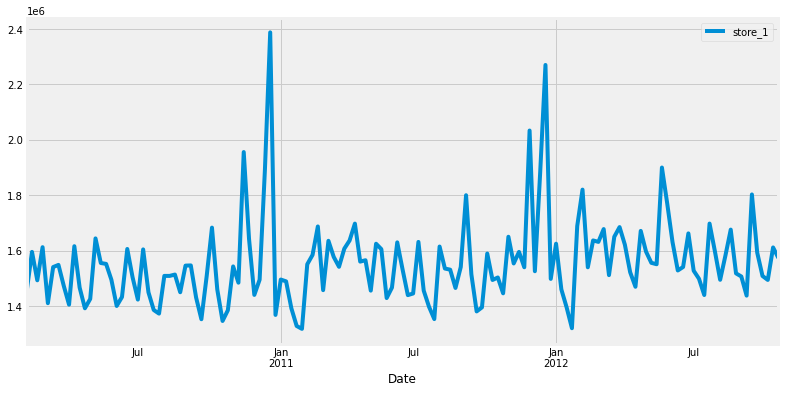

In [96]:
df_week_s1.plot(figsize=(12,6));

In [97]:
adf_test(df_week_s1)

Augmented Dickey-Fuller Test: 
ADF test statistic     -9.595634e+00
p-value                 1.981888e-16
# lags used             0.000000e+00
# observations          1.420000e+02
critical value (1%)    -3.477262e+00
critical value (5%)    -2.882118e+00
critical value (10%)   -2.577743e+00
Strong evidence against the null hypothesis.
Reject the null hypothesis.
Data has no unit root and Time-series data is stationary.


#### 6.3 Decomposing Weekly Data to Observe Seasonality
Seasonal Decomposition
Statsmodels provides a seasonal decomposition tool we can use to separate out the different components. This lets us see quickly and visually what each component contributes to the overall behavior.

We apply an additive model when it seems that the trend is more linear and the seasonality and trend components seem to be constant over time.

A multiplicative model is more appropriate when we are increasing (or decreasing) at a non-linear rate

#### Running an ETS Decomposition

In [98]:
decomposed = decompose(df_week_s1['store_1'].values, 'additive', m=12) #decomposing of weekly data 

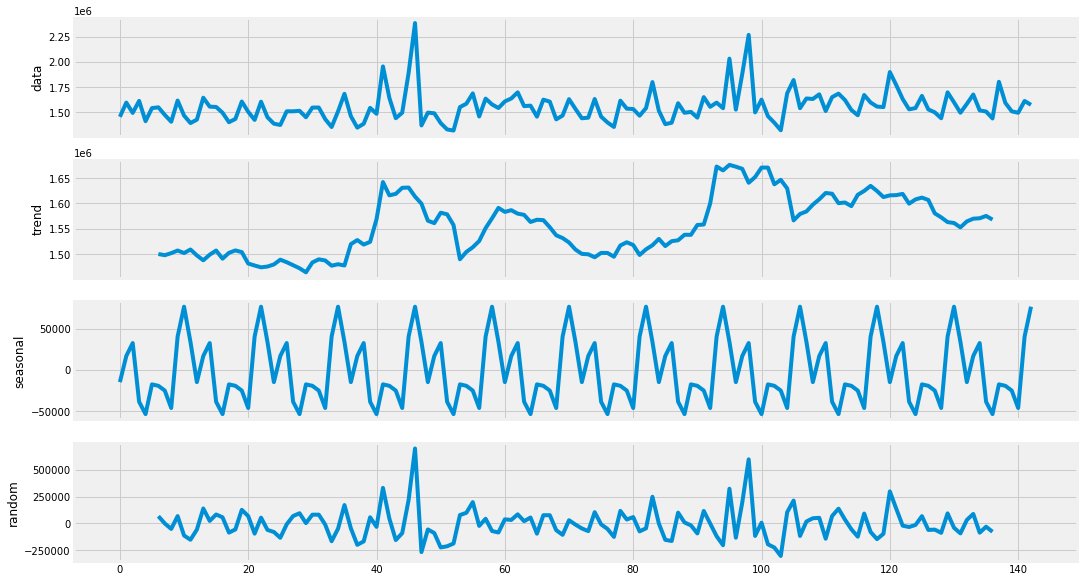

In [99]:
decomposed_plot(decomposed, figure_kwargs={'figsize': (16, 10)})
plt.show()

<AxesSubplot:>

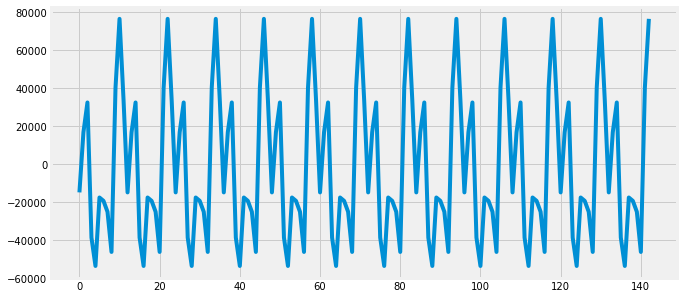

In [102]:
pd.Series(decomposed.seasonal).plot(figsize=(10,5))

#### 6.4 Choosing SARIMAX Orders

SARIMA (Seasonal Autoregressive Integrated Moving Average) and SARIMAX (Seasonal Autoregressive Integrated Moving Average with Exogenous Variables) models are extensions of the ARIMA models that take into account the seasonal component of time series data. These models are commonly used for forecasting time series data with seasonal patterns.

SARIMA Model: The SARIMA model is an extension of the ARIMA model that incorporates seasonal components. It is defined by three main components: (p, d, q) for the non-seasonal part, (P, D, Q, s) for the seasonal part, and an optional constant term. Here's what each component represents:

p: Order of the autoregressive (AR) component, indicating the number of lagged observations to consider for predicting the current value.

d: Order of differencing, indicating the number of times the time series needs to be differenced to achieve stationarity.

q: Order of the moving average (MA) component, indicating the number of lagged forecast errors to consider for predicting the current value.

P: Order of the seasonal autoregressive (SAR) component, similar to p but for the seasonal component.

D: Order of seasonal differencing, similar to d but for the seasonal component.

Q: Order of the seasonal moving average (SMA) component, similar to q but for the seasonal component.

s: Seasonal period, representing the number of observations in a single season.

SARIMAX Model: The SARIMAX model is an extension of SARIMA that allows for the inclusion of exogenous variables in the model. In addition to the seasonal and non-seasonal components, SARIMAX models can incorporate external factors that may influence the time series being forecasted. These exogenous variables can provide additional information and improve the accuracy of the forecasts.

In [110]:
from IPython.display import display, Image

# Direct URL to the image file
image_url = "https://raw.githubusercontent.com/rajvepuri999/Capstone-project/main/fomula.jpg"

# Display the image
display(Image(url=image_url))


### Selecting Order using auto_arima

In [111]:
from pmdarima.arima import auto_arima
SARIMAX_model = auto_arima(df_week_s1['store_1'],seasonal=True,m=12,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.24 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3867.947, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3861.633, Time=0.14 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3848.196, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3865.953, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=3846.887, Time=0.06 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=3848.148, Time=0.25 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=3850.108, Time=0.40 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=3835.628, Time=0.19 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=3837.076, Time=0.38 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=3837.091, Time=0.45 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=3839.074, Time=0.61 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=3860.089, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=3836.267, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[12]

In [112]:
SARIMAX_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  143
Model:               SARIMAX(0, 1, 2)   Log Likelihood               -1912.789
Date:                Sun, 15 Oct 2023   AIC                           3831.578
Time:                        19:19:07   BIC                           3840.446
Sample:                    02-05-2010   HQIC                          3835.182
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5923      0.039    -15.200      0.000      -0.669      -0.516
ma.L2         -0.3195      0.050     -6.387      0.000      -0.418      -0.221
sigma2      2.808e+10   4.59e-13   6.12e+22      0.000    2.81e+10    2.81e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                73.91
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.56   Skew:                             1.12
Prob(H) (two-sided):                  0.05   Kurtosis:                         5.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.54e+37. Standard errors may be unstable.
"""

### Selecting Order using ACF & PACF plot

I have performed the ADF Test and the p-value is less then 0.05, as given data is already stationary.

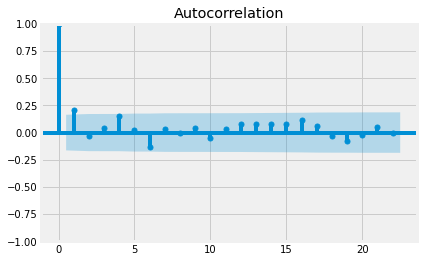

In [113]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

plot_acf(ts_df['store_1']);

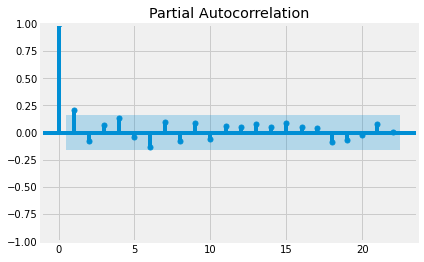

In [114]:
plot_pacf(ts_df['store_1']);

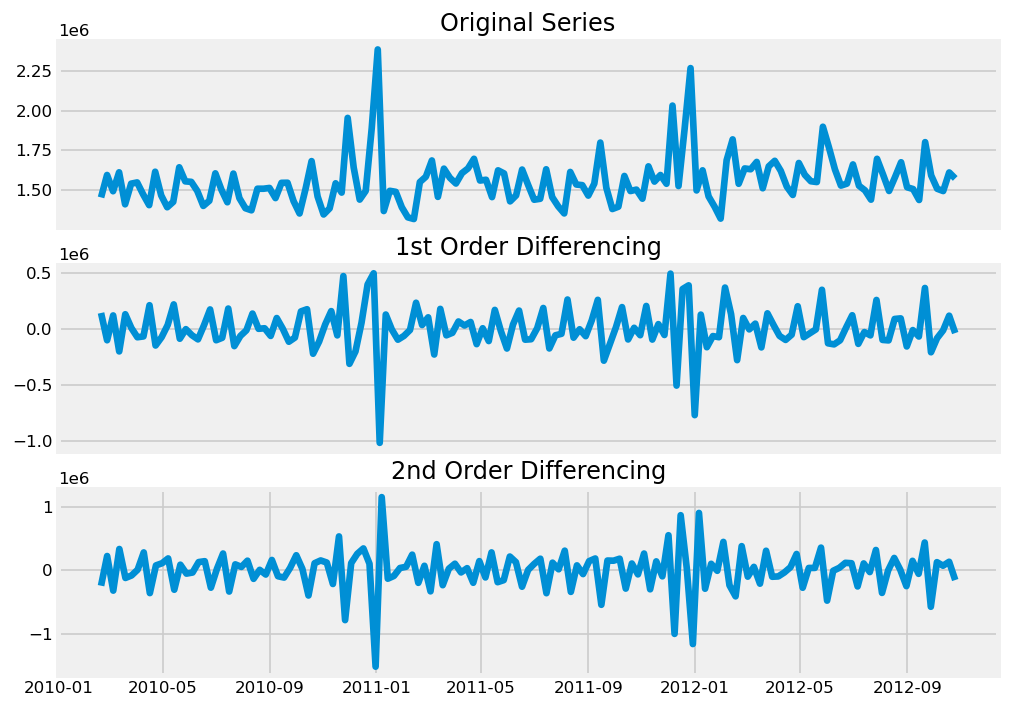

In [115]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(df_week_s1.store_1); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(df_week_s1.store_1.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(df_week_s1.store_1.diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

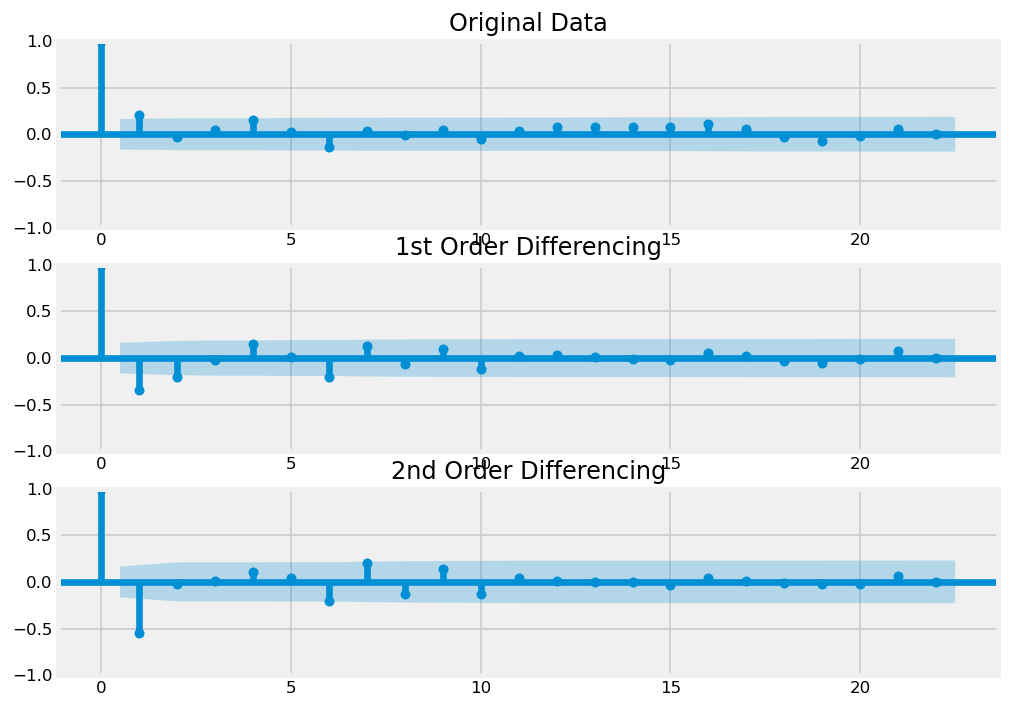

In [116]:
from statsmodels.graphics.tsaplots import plot_acf
fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(df_week_s1.store_1, ax=ax1, title='Original Data');
plot_acf(df_week_s1.store_1.diff().dropna(), ax=ax2, title='1st Order Differencing');
plot_acf(df_week_s1.store_1.diff().diff().dropna(), ax=ax3, title='2nd Order Differencing');

###### For non-seasonal data
p=0 or 1, d=1, q=2

#### Splitting the Train & Test set

In [117]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2012,1,13)
test_dataset_end=datetime(2012,10,26)

ts_train = df_week_s1[:train_dataset_end]
ts_test = df_week_s1[train_dataset_end+timedelta(days=7):test_dataset_end]

In [118]:
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(ts_train, order=(0,2,2), seasonal_order=(0,1,2,12) )
results = model.fit()
results.summary()

C:\Users\Raja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Raja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            store_1   No. Observations:                  102
Model:             SARIMAX(0, 2, 2)x(0, 1, 2, 12)   Log Likelihood               -1217.016
Date:                            Sun, 15 Oct 2023   AIC                           2444.032
Time:                                    19:22:07   BIC                           2456.419
Sample:                                02-05-2010   HQIC                          2449.023
                                     - 01-13-2012                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.5515      0.101    -15.339      0.000      -1.750      -1.353
ma.L2          0.5709      0.120      4.757      0.000       0.336       0.806
ma.S.L12      -0.4935      0.201     -2.451      0.014      -0.888      -0.099
ma.S.L24      -0.1091      0.171     -0.639      0.523      -0.444       0.225
sigma2      9.182e+10   5.94e-13   1.55e+23      0.000    9.18e+10    9.18e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 5.51
Prob(Q):                              0.76   Prob(JB):                         0.06
Heteroskedasticity (H):               1.30   Skew:                             0.13
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.25e+39. Standard errors may be unstable.
"""

In [119]:
pred_start_date = datetime(2012,1,13) #ts_test.index[0]
pred_end_date = datetime(2012,10,26) #ts_test.index[-1]
forecast_date = datetime(2013,1,18) # 12 week after date
display(pred_start_date, pred_end_date)

# start = len(ts_train)
# end = len(ts_train) + len(ts_test) -1

datetime.datetime(2012, 1, 13, 0, 0)

datetime.datetime(2012, 10, 26, 0, 0)

In [120]:
# forecasting for next 12 weeks -- Store_1
forecast_test = results.predict(start=pred_start_date, 
                           end=pred_end_date,
                           dynamic=False).rename('SARIMAX (0,2,2)(0,1,2,12) Predictions')

In [121]:
# forecasting for next 12 weeks -- Store_1
forecast_future = results.predict(start=pred_end_date, end=forecast_date)

<AxesSubplot:xlabel='Date'>

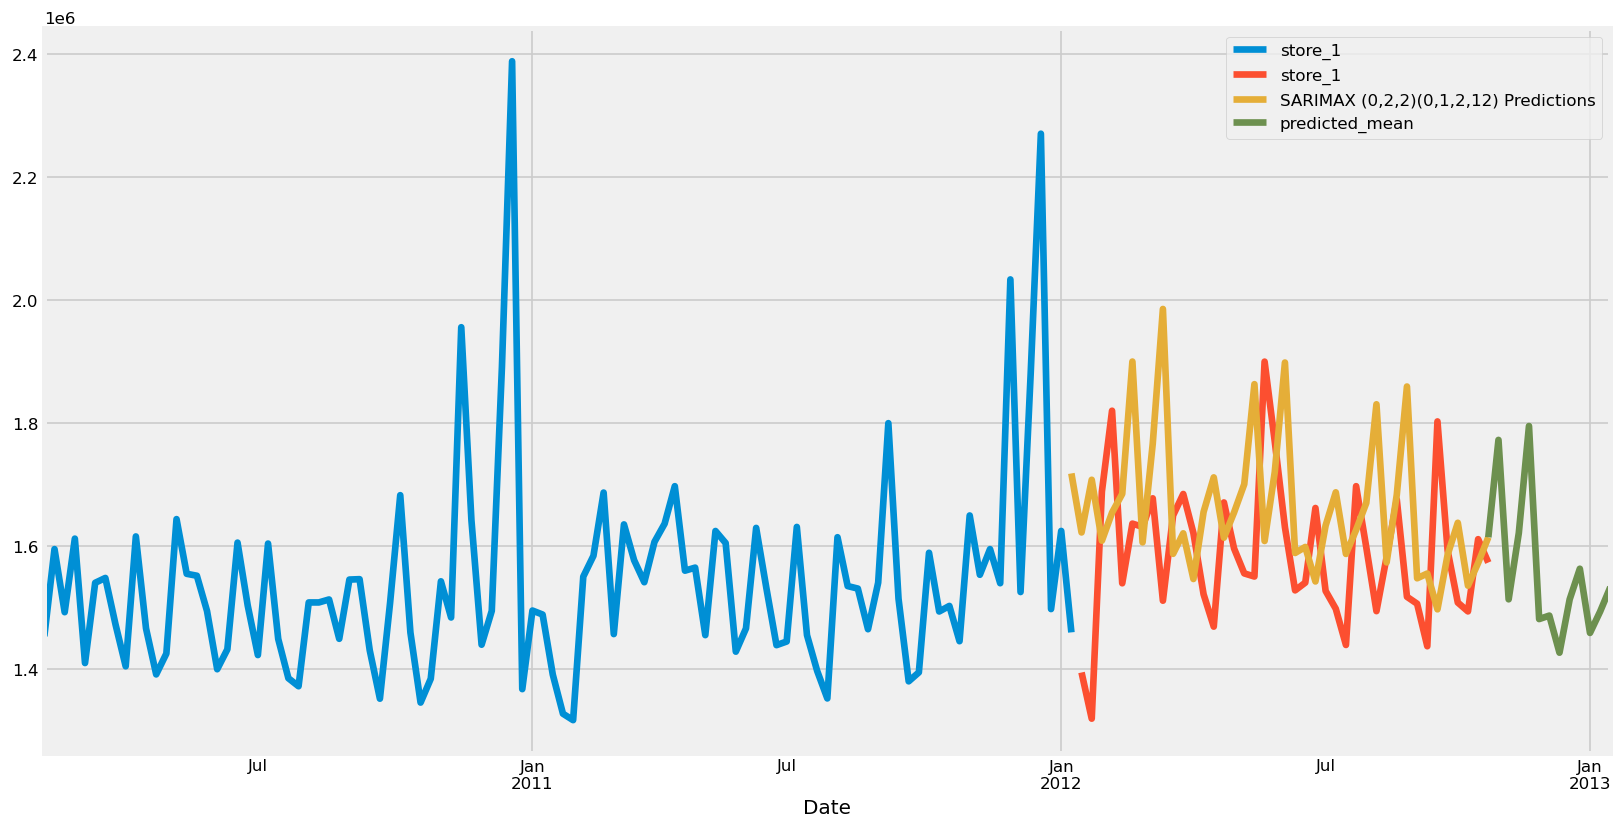

In [122]:
ts_train['store_1'].plot(figsize=(15,8), legend=True)
ts_test['store_1'].plot(legend=True)
forecast_test.plot(legend=True)
forecast_future.plot(legend=True)

### Conclusions

#### Saving the STAT.SARIMAX model

In [123]:
# Save the model using pickle

filename = 'SARIMAX_Stat_model.pkl'
results.save(filename)